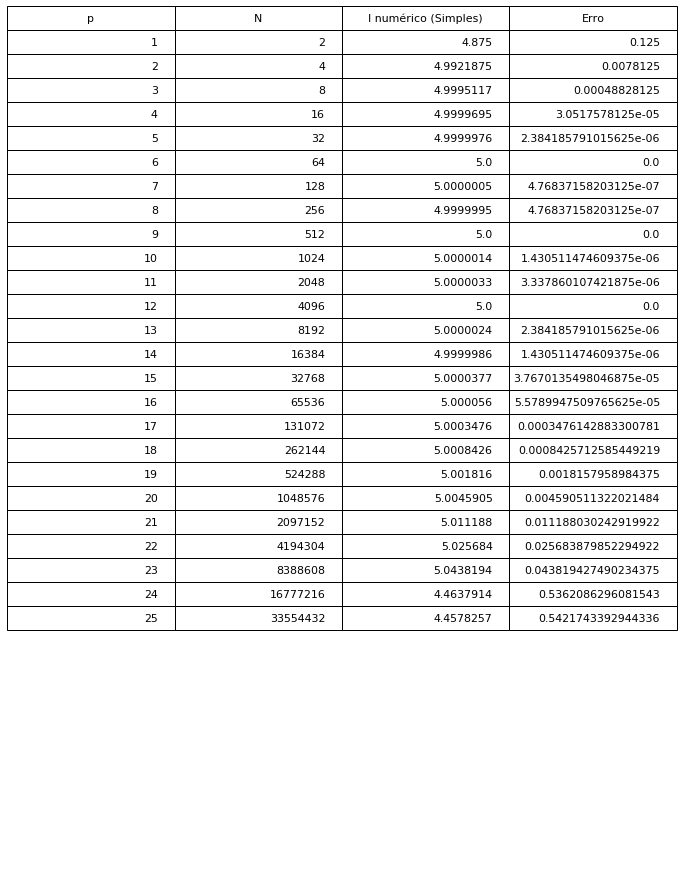

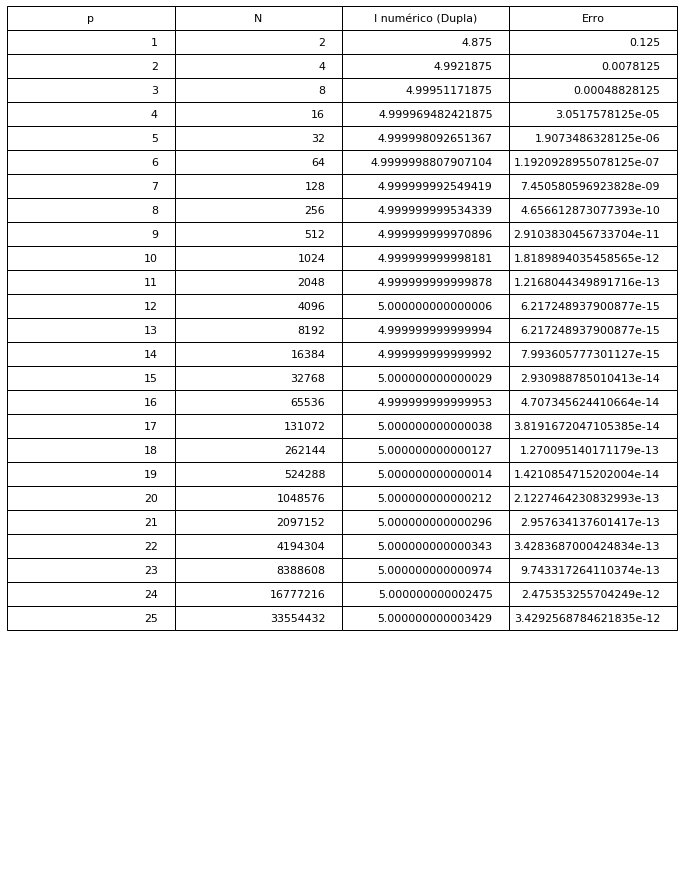

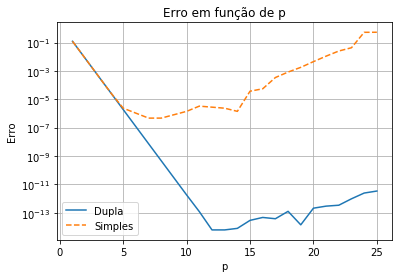

In [0]:
# O EXERCÍCIO PROGRAMA CONTÉM DIFERENTES MÉTODOS DE INTEGRAÇÃO E PRODUZ TABELAS COMPARANDO OS RESULTADOS

import matplotlib.pyplot as plt
import numpy as np

# Exercicio 1

def f(x):
  return 6-6*x**5

def SimpsonSimples(a,b,n): # Funcao integral pelo metodo de Simpson em precisao simples
  dx=np.float32((b-a)/n)
  x=[0]*(n+1)
  for i in range(n+1):
    x[i]=np.float32(a+dx*i)
  I=np.float32(f(x[0])+f(x[n]))
  for i in range(1,int(n/2)):
    I+=np.float32(2*f(x[2*i]))
  for i in range(1,int(n/2)+1):
    I+=np.float32(4*f(x[2*i-1]))
  I=np.float32(dx*I/3)
  return I

def SimpsonDupla(a,b,n): # Funcao integral pelo metodo de Simpson em precisao dupla
  dx=(b-a)/n
  x=[0]*(n+1)
  for i in range(n+1):
    x[i]=a+dx*i
  I=f(x[0])+f(x[n])
  for i in range(1,int(n/2)):
    I+=2*f(x[2*i])
  for i in range(1,int(n/2)+1):
    I+=4*f(x[2*i-1])
  I=dx*I/3
  return I

def tabela1(n=25): # Codigo para gerar as tabelas
  T1=[0]*n
  T2=[0]*n
  p=[0]*n
  Erro1=[0]*n
  Erro2=[0]*n
  for i in range(1,n+1):
    N=2**i
    p[i-1]=i
    In1=SimpsonSimples(0,1,N)
    In2=SimpsonDupla(0,1,N)
    Erro1[i-1]=abs(5-In1)
    Erro2[i-1]=abs(5-In2)
    T1[i-1]=[i,N,In1,Erro1[i-1]]
    T2[i-1]=[i,N,In2,Erro2[i-1]]
  Label=('p','N','I numérico (Simples)','Erro') # Codigo para gerar a tabela
  plt.axis('off')
  table=plt.table(cellText=T1,colLabels=Label,loc='top')
  table.scale(2,2)
  table.auto_set_font_size(False)
  table.set_fontsize(11)
  plt.show()
  Label=('p','N','I numérico (Dupla)','Erro') # Codigo para gerar a tabela
  plt.axis('off')
  table=plt.table(cellText=T2,colLabels=Label,loc='top')
  table.scale(2,2)
  table.auto_set_font_size(False)
  table.set_fontsize(11)
  plt.show()
  plt.plot(p,Erro2,label='Dupla')
  c=0
  while c!=len(Erro1): # Tirando os zeros do erro
    if Erro1[c]==0:
      Erro1.pop(c)
      p.pop(c)
    else: c+=1
  plt.plot(p,Erro1,label='Simples',linestyle='--')
  plt.yscale('log')
  plt.xlabel('p')
  plt.ylabel('Erro')
  plt.legend()
  plt.grid()
  plt.title('Erro em função de p')
  plt.show()
  
tabela1(25)

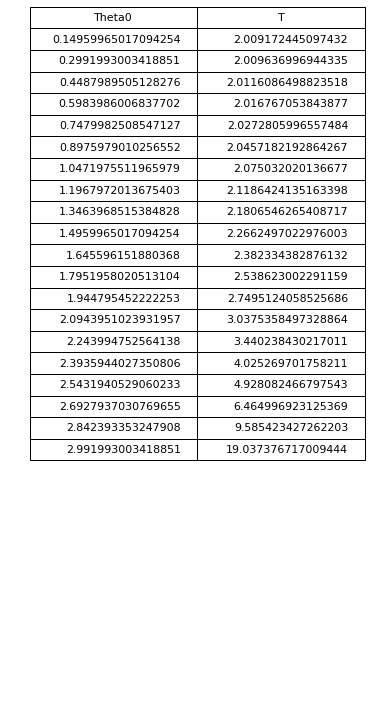

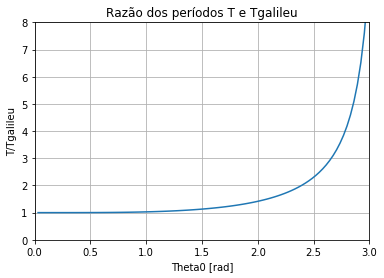

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Exercicio 2)

def per(x,th0,l=1,g=9.78):
  c=4*((l/g)**(1/2))
  k=(1-np.cos(th0))/2
  t=c/(1-(k*np.sin(x))**2)
  return t

def trapezio(a,b,n,th0,l=1,g=9.78):
  dx=(b-a)/n
  T=0
  for i in range(n):
    T+=dx*(per(a+i*dx,th0,l,g)+per(a+(1+i)*dx,th0,l,g))/2
  return T

def tabela2(n=20,N=1000):
  T=[0]*n
  d=np.pi/(n+1)
  for i in range(n):
    T[i]=[(1+i)*d,trapezio(0,np.pi/2,N,(1+i)*d)]
  Label=('Theta0','T') # Código para gerar a tabela
  plt.axis('off')
  table=plt.table(cellText=T,colLabels=Label,loc='top')
  table.scale(1,1.8)
  table.auto_set_font_size(False)
  table.set_fontsize(11)
  plt.show()
  
def grafico(n=100,N=100,l=1,g=9.78):
  d=np.pi/(n+1)
  Tg=2*np.pi*(l/g)**(1/2)
  T=[0]*n
  Tt=[0]*n
  for i in range(n):
    Tt[i]=(1+i)*d
    T[i]=trapezio(0,np.pi/2,N,Tt[i])/(2*np.pi*(l/g)**(1/2))
  plt.plot(Tt,T)
  plt.grid()
  plt.title('Razão dos períodos T e Tgalileu')
  plt.xlabel('Theta0 [rad]')
  plt.ylabel('T/Tgalileu')
  plt.xlim(0,3)
  plt.ylim(0,8)
  plt.show()
  
  
tabela2()
grafico()

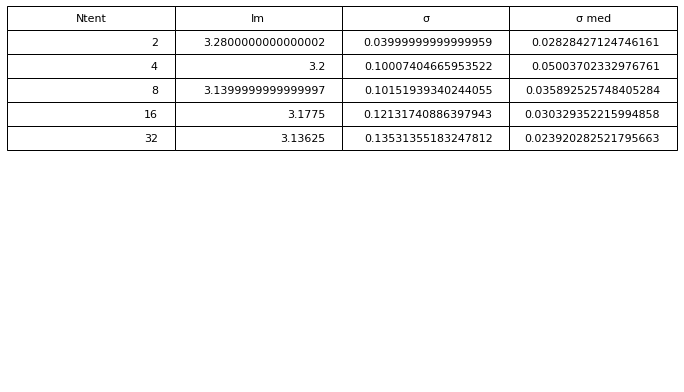

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time 

# Exercicio 3)

def random(z):
  U=(z%2147483647)/2147483647
  z=16807*z
  return U,z

def montecarlo(z,N=100,):
  dentro=0
  for i in range(N):
    x,z=random(z)
    y,z=random(z)
    if x**2+y**2<=1:
      dentro+=1
  return 4*dentro/N,z

def tabela3(N,z=10300723):
  Tab=[0]*N
  Isoma=0
  Sigsoma=0
  cont=0
  for i in range(1,(2**N)+1):
    I,z=montecarlo(z)
    Isoma+=I
    Im=Isoma/i
    Sigsoma+=(I-Im)**2
    if 2**(cont+1)==i:
      Lin=[0]*4
      Lin[0]=i
      Lin[1]=Im
      Sig=(Sigsoma/(i-1))**(1/2)
      Lin[2]=Sig
      Lin[3]=Sig/(i**(1/2))
      Tab[cont]=Lin
      cont+=1
  Label=('Ntent','Im','σ','σ med') # Codigo para gerar a tabela
  plt.axis('off')
  table=plt.table(cellText=Tab,colLabels=Label,loc='top')
  table.scale(2,2)
  table.auto_set_font_size(False)
  table.set_fontsize(11)
  plt.show()


tabela3(5)

3.16


<function matplotlib.pyplot.show>

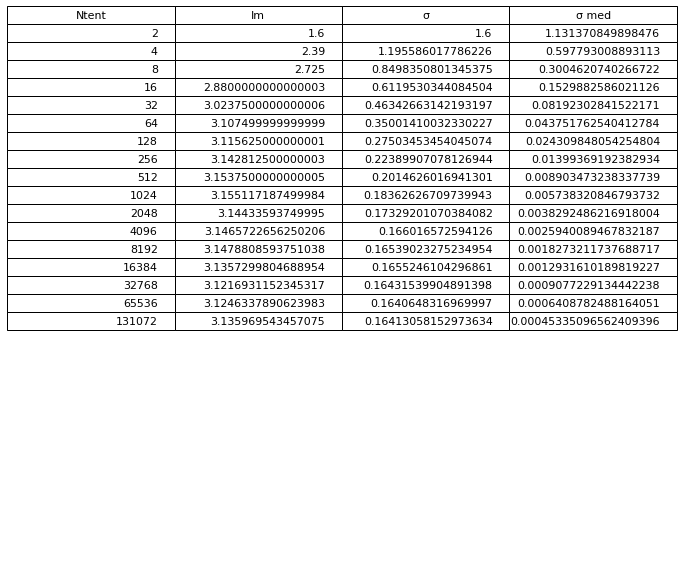

In [0]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt

#Item A
def f(x): #defino a funcao primeiro quadrante do circulo unitario
    return np.sqrt(1-x**2) 

def monte_carlo(seed_x, seed_y):
    cont_dentro = 0 #contador para pontos dentro do circulo
    cont_total = 0 #contador para o total de pontos
    a=16807
    m=2147483647
    for i in range(0,100):
        seed_x = (a*seed_x)%m #aplico LCG para x
        rand_x = seed_x/m
        seed_y = (a*seed_y)%m #aplico LCG para y
        rand_y = seed_y/m
        if rand_y <= f(rand_x): #se o ponto gerado esta dentro do circulo:
            cont_dentro+=1 #somo o numero de pontos dentro e o total
            cont_total+=1
        else: #se não:
            cont_total+=1
    return 4*(cont_dentro/cont_total) #retorna 4x a razao entre os pontos dentro e o total

#Item B
seed_x = 10300723 #seed para os valores de x
seed_y = 10300724 #seed para os valores de y
print(monte_carlo(seed_x, seed_y))

#Item C
dados = [] #lista de dados para criar tabela
n = 2 #iteracao para imprimir tabela
I_m = 0 #valor medio da integral
soma_I = 0 #variavel para somar valores de I_m
dif_I = 0 #diferenca entre I_m e I
soma_dif = 0 #variavel para somar valores de dif_I
while n<=131072:
   seed_x += 1 #modifico a seed para x
   seed_y += 1 #modifico a seed para y
   I = monte_carlo(seed_x, seed_y) #calculo a integral pelo metodo de monte carlo
   soma_I += I #calculo a soma para os valores de I
   I_m = soma_I/n #e a media
   dif_I = (I_m - I)**2 #calculo a diferenca para calcular sigma
   soma_dif += dif_I #calculo a soma para os valores de dif_I
   σ = np.sqrt(soma_dif/(n-1)) #calculo σ
   σ_m = σ/np.sqrt(n) #calculo σ_m
   if (n & (n-1) == 0) and n != 0: #se a iteracao eh uma potencia de 2
       dados.append([n, I_m, σ, σ_m]) #adiciono os valores calculados na lista de dados
   n += 1
   
#Motando a tabela   
col = ('Ntent','Im','σ','σ med') 
table = plt.table(cellText=dados,colLabels=col,loc='top')
plt.axis('off')
table.scale(2.0,1.5)
table.auto_set_font_size(False)
table.set_fontsize(11)
plt.show